# **Housing Price Prediction Project**


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [27]:
file_path = "vietnam_housing_dataset.csv"
house_data = pd.read_csv(file_path)
house_data.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [28]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [29]:
house_data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


In [30]:
house_data.isnull().sum()

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64

We are only interested in predicting prices for the Hanoi area, so let's extract the corresponding rows.

In [31]:
hanoi_data = house_data[house_data['Address'].str.contains("Hà Nội", na=False)]

hanoi_data.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
7,"Dự án Him Lam Thường Tín, Huyện Thường Tín, Hà...",74.0,5.0,18.0,Nam,Nam,5.0,4.0,5.0,Have certificate,NaN,9.9
31,"Đường An Dương Vương, Phường Phú Thượng, Tây H...",72.0,5.6,3.5,NaN,NaN,1.0,NaN,NaN,Have certificate,Basic,10.0
35,"Ngõ 132, Đường Cầu Giấy, Phường Quan Hoa, Cầu ...",32.8,4.5,6.0,NaN,NaN,5.0,NaN,NaN,Have certificate,NaN,7.5
41,"Xã Lại Thượng, Thạch Thất, Hà Nội",378.0,NaN,NaN,NaN,NaN,2.0,3.0,3.0,Have certificate,Full,7.8
43,"Đường Phú Mỹ, Phường Mỹ Đình 1, Nam Từ Liêm, H...",54.0,5.8,3.0,Tây - Bắc,Tây - Bắc,4.0,6.0,6.0,Have certificate,Full,8.8


In [32]:
hanoi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 7 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            10460 non-null  object 
 1   Area               10460 non-null  float64
 2   Frontage           5997 non-null   float64
 3   Access Road        4342 non-null   float64
 4   House direction    1675 non-null   object 
 5   Balcony direction  1125 non-null   object 
 6   Floors             9731 non-null   float64
 7   Bedrooms           8453 non-null   float64
 8   Bathrooms          7321 non-null   float64
 9   Legal status       9267 non-null   object 
 10  Furniture state    6538 non-null   object 
 11  Price              10460 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.0+ MB


In [33]:
hanoi_data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,10460.000000,5997.000000,4342.000000,9731.000000,8453.000000,7321.000000,10460.000000
mean,43.988909,5.085416,4.848333,4.417634,3.786111,3.683103,6.154447
std,20.661673,5.187131,5.661229,1.060684,1.309404,1.221551,2.035906
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.050000
25%,34.000000,3.700000,3.000000,4.000000,3.000000,3.000000,4.650000
50%,40.000000,4.000000,3.000000,5.000000,4.000000,4.000000,6.100000
75%,49.000000,5.000000,5.000000,5.000000,4.000000,4.000000,7.650000
max,539.000000,77.000000,80.000000,10.000000,9.000000,9.000000,11.500000


In [34]:
hanoi_data.isnull().sum()

Address                 0
Area                    0
Frontage             4463
Access Road          6118
House direction      8785
Balcony direction    9335
Floors                729
Bedrooms             2007
Bathrooms            3139
Legal status         1193
Furniture state      3922
Price                   0
dtype: int64

# EDA and Feature Engineering

First, I want to look at the target variable: Price

<Axes: xlabel='Price', ylabel='Count'>

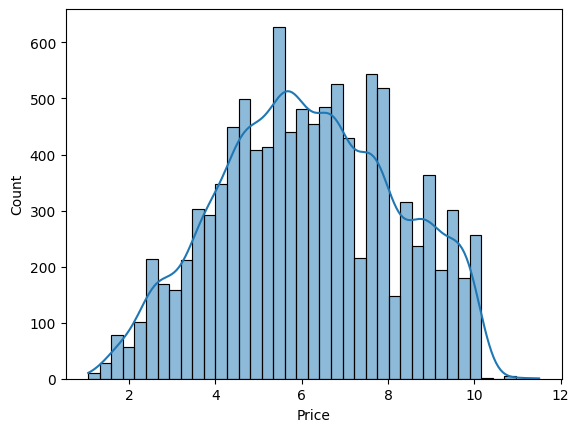

In [35]:
sns.histplot(hanoi_data['Price'], kde=True)

Its distribution seems not too skewed so there is no need for any transformation. Now let's look at the relationship between it and the numerical features.

## Numerical Features

In [36]:
# First, we need to fill N/A values
# Filling NaN in floors, bedrooms, and bathrooms with 1.0 since 0 does not make sense
hanoi_data['Floors'].fillna(1, inplace=True)
hanoi_data['Bedrooms'].fillna(1, inplace=True)
hanoi_data['Bathrooms'].fillna(1, inplace=True)
# Filling NaN in Frontage and Access Road with 0
hanoi_data['Frontage'].fillna(0, inplace=True)
hanoi_data['Access Road'].fillna(0, inplace=True)

hanoi_data.head()

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
7,"Dự án Him Lam Thường Tín, Huyện Thường Tín, Hà...",74.0,5.0,18.0,Nam,Nam,5.0,4.0,5.0,Have certificate,NaN,9.9
31,"Đường An Dương Vương, Phường Phú Thượng, Tây H...",72.0,5.6,3.5,NaN,NaN,1.0,1.0,1.0,Have certificate,Basic,10.0
35,"Ngõ 132, Đường Cầu Giấy, Phường Quan Hoa, Cầu ...",32.8,4.5,6.0,NaN,NaN,5.0,1.0,1.0,Have certificate,NaN,7.5
41,"Xã Lại Thượng, Thạch Thất, Hà Nội",378.0,0.0,0.0,NaN,NaN,2.0,3.0,3.0,Have certificate,Full,7.8
43,"Đường Phú Mỹ, Phường Mỹ Đình 1, Nam Từ Liêm, H...",54.0,5.8,3.0,Tây - Bắc,Tây - Bắc,4.0,6.0,6.0,Have certificate,Full,8.8


See the plots between every numerical features with Price to see if there are many outliers.

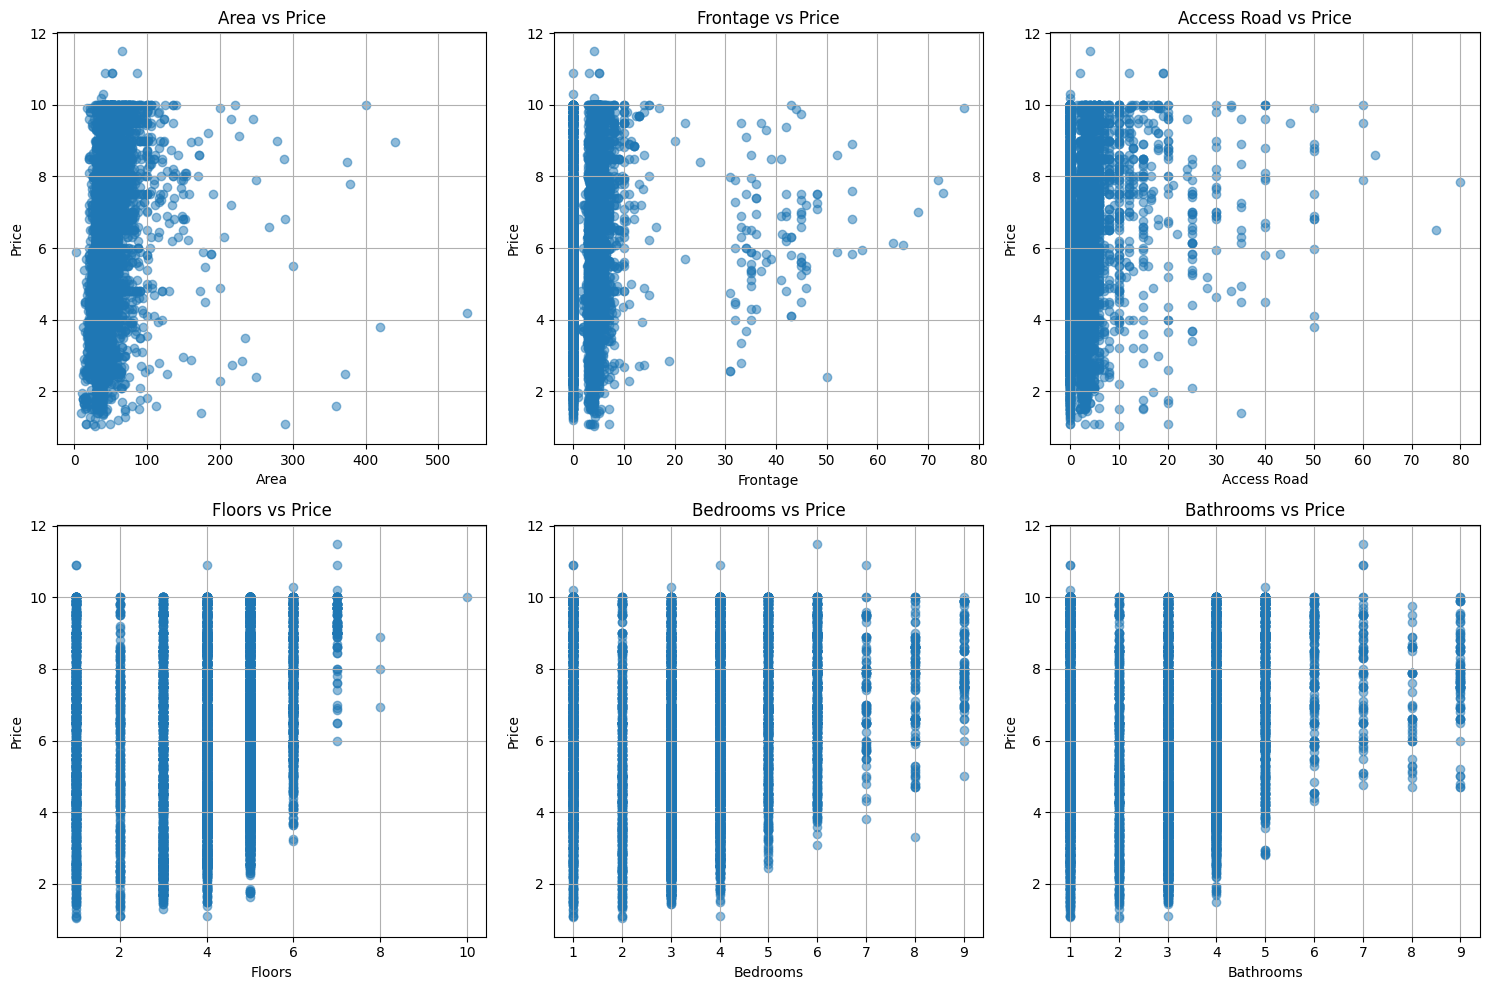

In [37]:
numerical_features = hanoi_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
for i, feature in enumerate(numerical_features):  
    row = i // 3  
    col = i % 3   
    axes[row, col].scatter(hanoi_data[feature], hanoi_data['Price'], alpha=0.5)
    axes[row, col].set_title(f'{feature} vs Price')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Price')
    axes[row, col].grid(True)
plt.tight_layout()
plt.show()


## Duplicates and outliers detection

In [38]:
hanoi_data.drop_duplicates()
print(f"Before filtering: {hanoi_data.shape}")
numerical_cols = hanoi_data.select_dtypes(include=[np.number]).columns
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final
for column in numerical_cols:
    hanoi_data = remove_outlier_IQR(hanoi_data, column)
hanoi_data.reset_index(inplace = False)
print(f"After filtering: {hanoi_data.shape}")

Before filtering: (10460, 12)
After filtering: (5499, 12)


## Correlation Heatmap

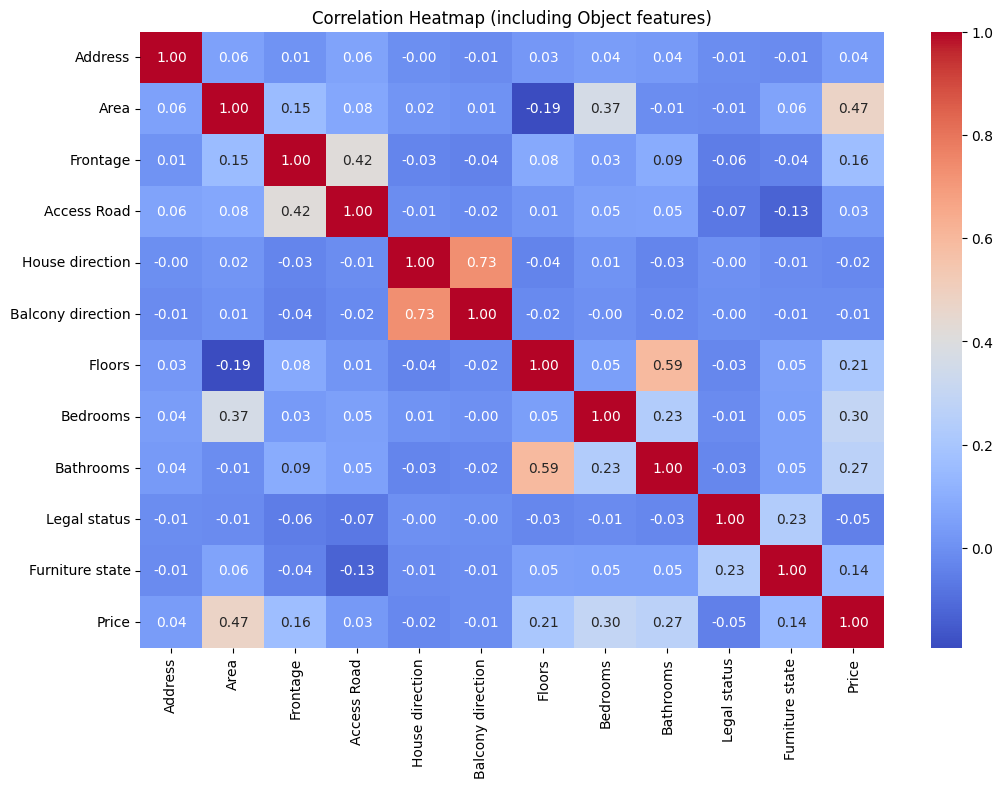

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copy dữ liệu để tránh ảnh hưởng
df_encoded = hanoi_data.copy()

# Chuyển tất cả cột object thành số
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Chuyển về dạng số
    label_encoders[col] = le

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (including Object features)')
plt.show()


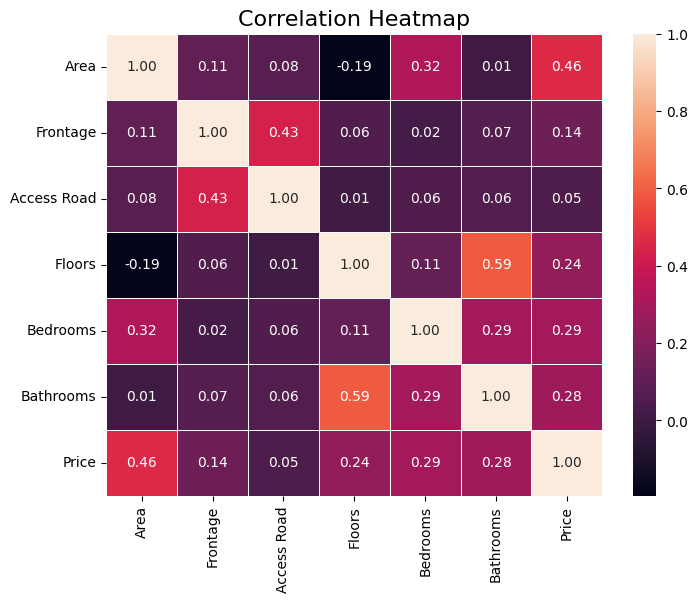

In [40]:
#Let see the new features' correlation
numerical_features = hanoi_data.select_dtypes(include=['number']).columns
corr_matrix = hanoi_data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Filling N/A in Legal and Furniture with None (a house has no legal paper attached or no furniture equipped)

In [41]:
hanoi_data['Legal status'].fillna('None', inplace=True)
hanoi_data['Furniture state'].fillna('None', inplace=True)

Considering both 'direction' columns, I believe we can drop them as the null values are more than 2/3 and they do not contribute much to the price in real life

In [42]:
hanoi_data.drop('House direction', inplace = True, axis = 1)
hanoi_data.drop('Balcony direction', inplace = True, axis = 1)

In [43]:
hanoi_data.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
45,"Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ...",41.0,0.0,3.5,5.0,4.0,4.0,Have certificate,Full,10.00
46,"Yên Nghĩa, Hà Đông, Hà Nội",35.0,0.0,0.0,4.0,3.0,3.0,Have certificate,Basic,2.90
49,"Phụng Châu, Chương Mỹ, Hà Nội",38.0,0.0,0.0,3.0,3.0,3.0,Have certificate,Full,2.10
71,"Ngõ 7, Phố Thái Hà, Phường Trung Liệt, Đống Đ...",52.0,4.0,3.0,4.0,4.0,4.0,None,None,6.50
72,"Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",45.0,6.0,3.0,4.0,4.0,4.0,Have certificate,None,7.65


In [44]:
hanoi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5499 entries, 45 to 30228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          5499 non-null   object 
 1   Area             5499 non-null   float64
 2   Frontage         5499 non-null   float64
 3   Access Road      5499 non-null   float64
 4   Floors           5499 non-null   float64
 5   Bedrooms         5499 non-null   float64
 6   Bathrooms        5499 non-null   float64
 7   Legal status     5499 non-null   object 
 8   Furniture state  5499 non-null   object 
 9   Price            5499 non-null   float64
dtypes: float64(7), object(3)
memory usage: 472.6+ KB


In [45]:
hanoi_data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,39.237314,2.664934,1.671777,4.506274,3.520095,3.586834,5.753375
std,9.200261,2.187141,1.842879,0.775504,0.704469,0.723418,1.943518
min,12.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.300000
25%,33.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.400000
50%,38.000000,3.500000,1.800000,5.000000,3.000000,4.000000,5.650000
75%,45.000000,4.000000,3.000000,5.000000,4.000000,4.000000,7.050000
max,71.000000,10.000000,7.000000,6.000000,5.000000,5.000000,10.300000


In [46]:
hanoi_data.isnull().sum()

Address            0
Area               0
Frontage           0
Access Road        0
Floors             0
Bedrooms           0
Bathrooms          0
Legal status       0
Furniture state    0
Price              0
dtype: int64

The 'Address' column gives us an important features: the 'District' where the house is located

In [47]:
hanoi_data['District'] = hanoi_data['Address'].str.split(", ").str[-2].str.replace(".", "")

hanoi_data.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,District
45,"Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ...",41.0,0.0,3.5,5.0,4.0,4.0,Have certificate,Full,10.00,Cầu Giấy
46,"Yên Nghĩa, Hà Đông, Hà Nội",35.0,0.0,0.0,4.0,3.0,3.0,Have certificate,Basic,2.90,Hà Đông
49,"Phụng Châu, Chương Mỹ, Hà Nội",38.0,0.0,0.0,3.0,3.0,3.0,Have certificate,Full,2.10,Chương Mỹ
71,"Ngõ 7, Phố Thái Hà, Phường Trung Liệt, Đống Đ...",52.0,4.0,3.0,4.0,4.0,4.0,None,None,6.50,Đống Đa
72,"Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",45.0,6.0,3.0,4.0,4.0,4.0,Have certificate,None,7.65,Đống Đa


In [48]:
# I want to drop rows that belong to provinces with fewer than 5 occurrences
unique_provinces = hanoi_data['District'].value_counts()
unique_provinces = unique_provinces[unique_provinces < 5].index
hanoi_data = hanoi_data[~hanoi_data['District'].isin(unique_provinces)]

# Dropping Address since we don't need it anymore
hanoi_data.drop('Address', axis = 1, inplace = True)

Let's see if the intuition is correct.


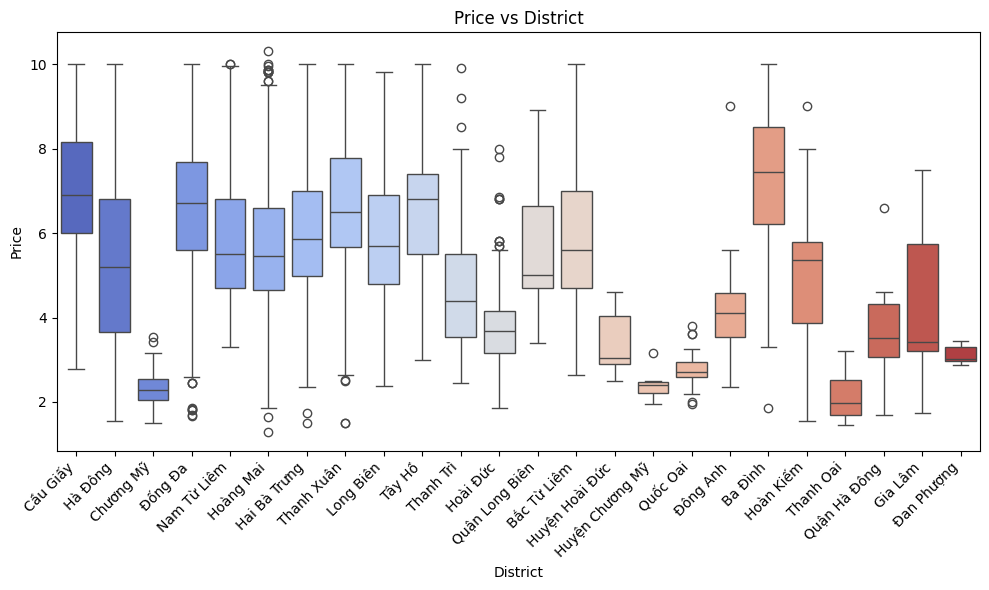

In [49]:
# Create the box plot for Price vs Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Price', data=hanoi_data, palette= 'coolwarm')
plt.title('Price vs District')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
# Show the plot
plt.tight_layout()
plt.show()

# Model Training

We want to try different approaches and then compare models to select the best one. List of training methods:
1. Linear Regression
2. Support Vector Machine (SVR)
3. Random Forest
4. XGBoost
5. LGBoost

First, import all the necessary libraries.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler # needed to convert object columns to number
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [51]:
print(hanoi_data["District"].unique())

['Cầu Giấy' 'Hà Đông' 'Chương Mỹ' 'Đống Đa' 'Nam Từ Liêm' 'Hoàng Mai'
 'Hai Bà Trưng' 'Thanh Xuân' 'Long Biên' 'Tây Hồ' 'Thanh Trì' 'Hoài Đức'
 'Quận Long Biên' 'Bắc Từ Liêm' 'Huyện Hoài Đức' 'Huyện Chương Mỹ'
 'Quốc Oai' 'Đông Anh' 'Ba Đình' 'Hoàn Kiếm' 'Thanh Oai' 'Quận Hà Đông'
 'Gia Lâm' 'Đan Phượng']


We still have categorical columns in our dataset that need to be converted to number in order to be fitted into the model.
After testing, we concluded that converting the district name to the average price of houses in that district gives better results. 

In [52]:
# Converting the categorical columns to numbers
label_encoders = {}
for col in ["Legal status", "Furniture state"]:
    le = LabelEncoder()
    hanoi_data[col] = le.fit_transform(hanoi_data[col])
    label_encoders[col] = le

#Converting the District column to average price of houses in that district
district_avg_price = hanoi_data.groupby("District")["Price"].mean().round(2)
hanoi_data["District"] = hanoi_data["District"].map(district_avg_price)

In [53]:
hanoi_data.head(10)

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,District
45,41.0,0.0,3.5,5.0,4.0,4.0,0,1,10.00,7.15
46,35.0,0.0,0.0,4.0,3.0,3.0,0,0,2.90,5.34
49,38.0,0.0,0.0,3.0,3.0,3.0,0,1,2.10,2.31
71,52.0,4.0,3.0,4.0,4.0,4.0,1,2,6.50,6.55
72,45.0,6.0,3.0,4.0,4.0,4.0,0,2,7.65,6.55
77,36.0,7.0,3.0,5.0,3.0,4.0,0,1,5.60,5.92
94,35.0,5.0,2.0,5.0,5.0,4.0,0,1,6.85,7.15
111,33.0,3.0,2.0,5.0,3.0,4.0,0,1,4.48,5.73
116,30.0,3.4,3.0,6.0,4.0,5.0,1,1,5.65,6.55
123,60.0,0.0,3.0,4.0,4.0,3.0,0,0,2.65,2.31


The data looks ready for training. We will split the data into a 75/25 training/test proportion.

In [54]:
X = hanoi_data.drop(columns=["Price"])
y = hanoi_data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Linear regression

First, let's try fitting a linear regression model for our dataset. Because our dataset has numerous categorical variables, our hope is just to build a model that will serve as a benchmark for others.

In [55]:
# Khởi tạo mô hình Linear Regression
lr_model = LinearRegression()

# Thực hiện Cross Validation với 5 folds
mse_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=5)

# Chuyển đổi giá trị MSE sang dương
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

# In kết quả Cross Validation
print(f"Cross-validation MSE: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Cross-validation R²: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}")

# Huấn luyện mô hình trên toàn bộ tập train
lr_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_lr = lr_model.predict(X_test)

# Tính R² và MSE trên tập test
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Test R²: {r2_lr}")
print(f"Test MSE: {mse_lr}")


Cross-validation MSE: [1.66335998 1.53172993 1.51855977 1.6443117  1.80674606]
Mean MSE: 1.6329414895025969
Mean RMSE: 1.2772204416482464
Cross-validation R²: [0.56953701 0.59009347 0.60267084 0.56375857 0.52959359]
Mean R²: 0.5711306967834845
Test R²: 0.5542311628216832
Test MSE: 1.620463018846626


Cross-validation MSE and R² is almost the same as test set's, so no problem there. We proceed to plot two graphs to visualize how well we predicted the price using this model, one on the train set and the other on the test set.

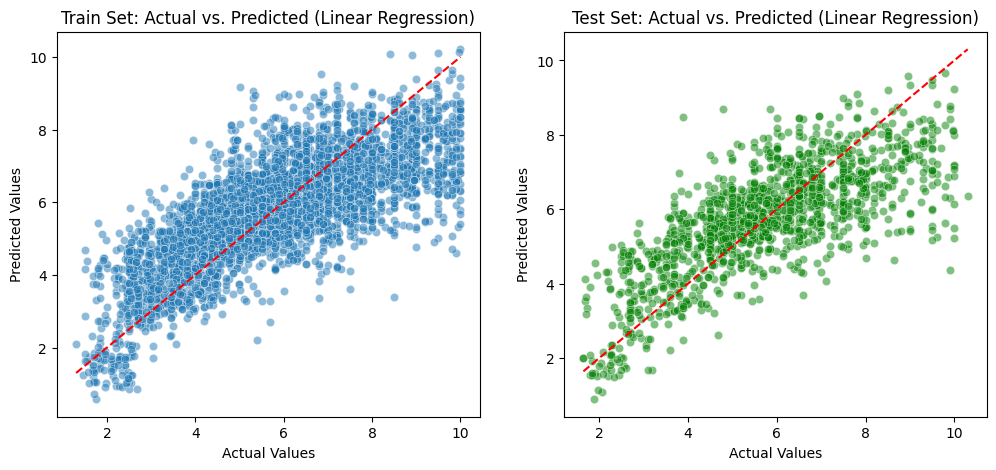

In [56]:
# Dự đoán trên tập train & test
y_pred_train_lr = lr_model.predict(X_train)

plt.figure(figsize=(12, 5))

# Train Set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train_lr, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Train Set: Actual vs. Predicted (Linear Regression)")

# Test Set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted (Linear Regression)")

plt.show()


### Random Forest
Next is Random Forest. Instead of using cross-validation, we can use out-of-bag score to evaluate the model due to the bootstrapping nature of the algorithm. 

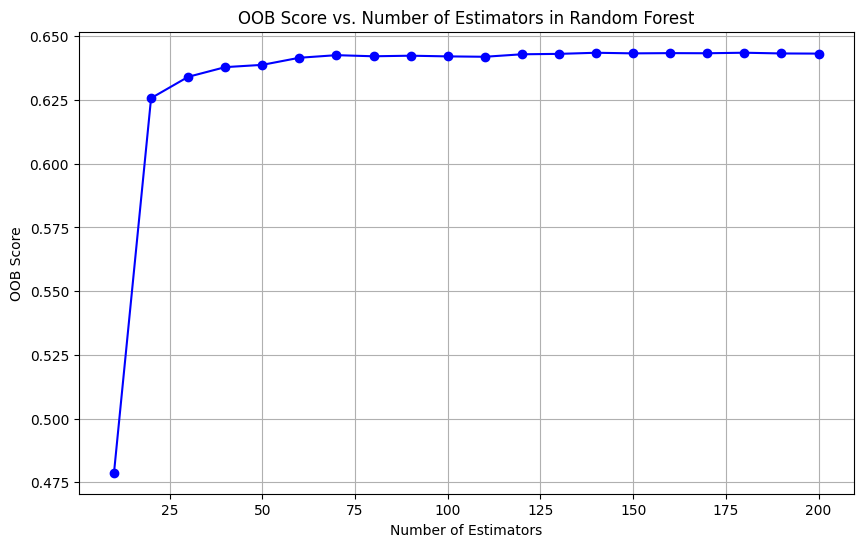

Out-of-Bag R²: 0.643214121124345
Test R²: 0.6289028687858347
Test MSE: 1.3490157395010471


In [57]:
# Khởi tạo mô hình Random Forest
# Lưu lại OOB score trong quá trình huấn luyện
oob_scores = []
for n_estimators in range(10, 210, 10):
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42,
        oob_score=True
    )
    rf_model.fit(X_train, y_train)
    oob_scores.append(rf_model.oob_score_)

# Vẽ biểu đồ OOB score
plt.figure(figsize=(10, 6))
plt.plot(range(10, 210, 10), oob_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Score')
plt.title('OOB Score vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()

# Sử dụng out-of-bag score để đánh giá mô hình
oob_score = rf_model.oob_score_
print(f"Out-of-Bag R²: {oob_score}")

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Test R²: {r2_rf}")
print(f"Test MSE: {mse_rf}")


We also plot the actual vs predicted values, and we can see a little improvement over linear regression model.

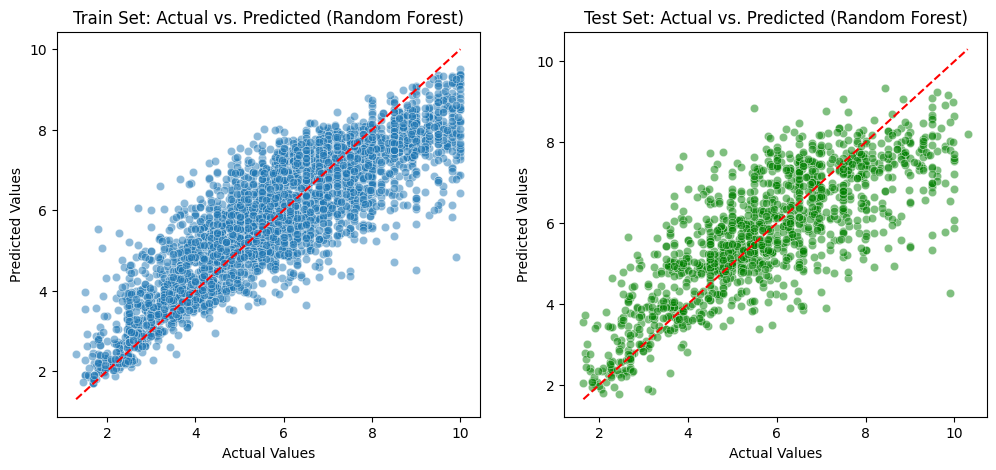

In [58]:
# Dự đoán trên tập train & test
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

plt.figure(figsize=(12, 5))

# Train Set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train_rf, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Train Set: Actual vs. Predicted (Random Forest)")

# Test Set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test_rf, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted (Random Forest)")

plt.show()


### SVR

Let's continue with SVR. There are not many hyperparameters to tune, so we let the algorithm do its work. 

In [59]:
# Tạo pipeline gồm StandardScaler + SVR
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Thực hiện Cross Validation với 5 folds
mse_scores = cross_val_score(svr_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(svr_pipeline, X_train, y_train, scoring='r2', cv=5)

# Chuyển đổi MSE sang dương
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

# In kết quả Cross Validation
print(f"Cross-validation MSE: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Cross-validation R²: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}")

# Huấn luyện mô hình trên toàn bộ tập train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_svr = svr_model.predict(X_test_scaled)

# Tính R² và MSE trên tập test
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f"Test R²: {r2_svr}")
print(f"Test MSE: {mse_svr}")


Cross-validation MSE: [1.59541725 1.45877653 1.45940706 1.50637017 1.72130646]
Mean MSE: 1.5482554940469615
Mean RMSE: 1.2436568245321395
Cross-validation R²: [0.58711999 0.60961654 0.61814807 0.60035492 0.55183874]
Mean R²: 0.5934156543307271
Test R²: 0.5745180963874262
Test MSE: 1.5467157694489868


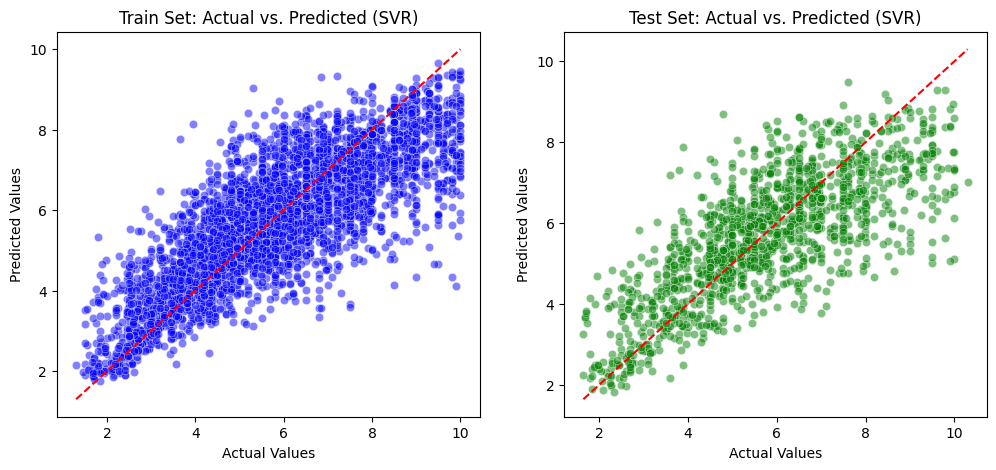

In [60]:
plt.figure(figsize=(12, 5))

# Train Set Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=svr_model.predict(X_train_scaled), alpha=0.5, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Train Set: Actual vs. Predicted (SVR)")

# Test Set Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted (SVR)")

plt.show()

### XGBoost

Lastly, let's try fitting an XGBoost model. First, we make sure the column names are standardized for the algorithm.

In [61]:
# Chuẩn hóa tên cột của X_train và X_test
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')
print(X_train.columns)
print(X_test.columns)

Index(['Area', 'Frontage', 'Access_Road', 'Floors', 'Bedrooms', 'Bathrooms',
       'Legal_status', 'Furniture_state', 'District'],
      dtype='object')
Index(['Area', 'Frontage', 'Access_Road', 'Floors', 'Bedrooms', 'Bathrooms',
       'Legal_status', 'Furniture_state', 'District'],
      dtype='object')


In [62]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình
xgb_model = xgb.XGBRegressor(random_state=42)

# Grid Search với danh sách giá trị cần thử
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [4, 6, 8],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.7, 0.8, 0.9],  
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model, param_grid=param_grid, 
    cv=5, scoring='r2', n_jobs=-1
)

# Huấn luyện
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best R²:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

# Dự đoán với mô hình tối ưu
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Đánh giá trên tập test
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Test R²:", r2_xgb)
print("Test MSE:", mse_xgb)

Best R²: 0.6470006953885956
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Test R²: 0.6322758225960018
Test MSE: 1.3367543464699607


In [63]:
# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=100, learning_rate=0.05, max_depth=8, 
    subsample=0.7, colsample_bytree=0.9, random_state=42
)

# Thực hiện Cross Validation với 5 folds
mse_scores = cross_val_score(xgb_model, X_train, y_train, 
                            scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(xgb_model, X_train, y_train, 
                            scoring='r2', cv=5)

# Chuyển đổi giá trị MSE sang dương
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

# In kết quả Cross Validation
print(f"Cross-validation MSE: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Cross-validation R²: {r2_scores}")
print(f"Mean R²: {r2_scores.mean()}")

# Huấn luyện mô hình trên toàn bộ tập train
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_xgb = xgb_model.predict(X_test)

# Tính R² và MSE trên tập test
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Test R²: {r2_xgb}")
print(f"Test MSE: {mse_xgb}")


Cross-validation MSE: [1.36945664 1.31987927 1.29813562 1.3405166  1.42251607]
Mean MSE: 1.3501008420871494
Mean RMSE: 1.1617909963719484
Cross-validation R²: [0.64559662 0.64678686 0.66034453 0.64435643 0.62963213]
Mean R²: 0.645343316746151
Test R²: 0.6333282078784376
Test MSE: 1.3329287057128354


XGBoost seems to be the best performing method so far, with better evaluation metrics than the others. We can also see the same from the plot:

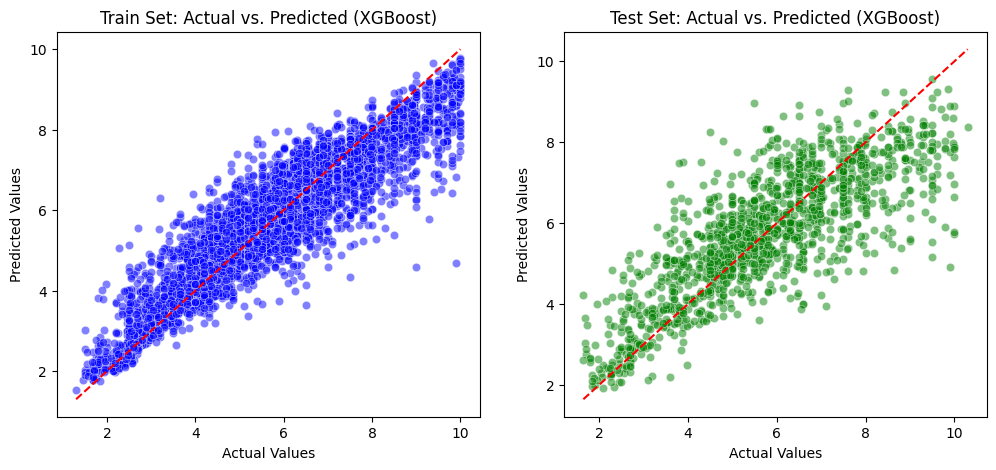

In [64]:
plt.figure(figsize=(12, 5))

# Train Set Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=xgb_model.predict(X_train), alpha=0.5, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Train Set: Actual vs. Predicted (XGBoost)")

# Test Set Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted (XGBoost)")

plt.show()

## Evaluation metrics comparison

Lastly, we plot a hybrid chart to compare evaluation metrics across different models. XGBoost is the best method with Random Forest being close second.

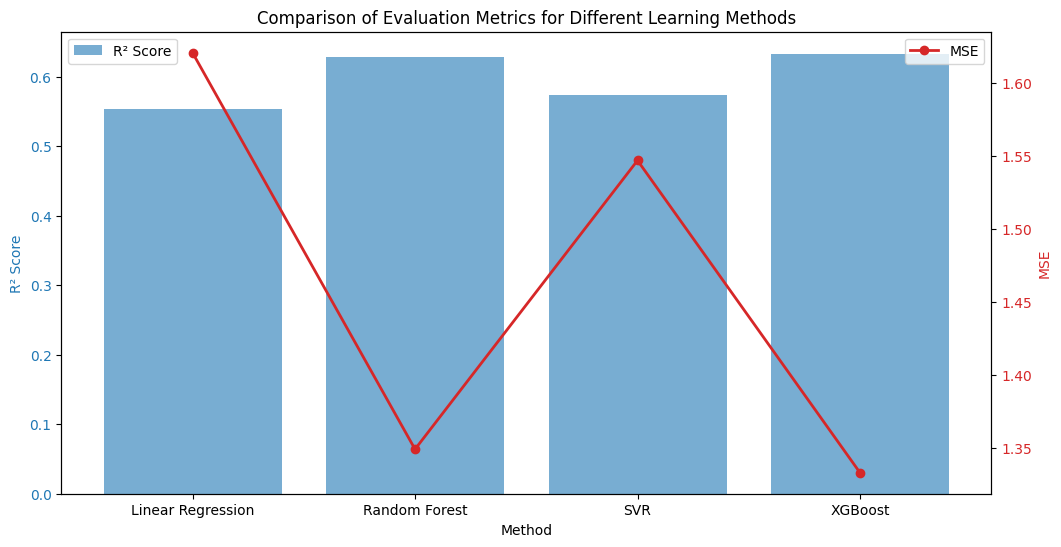

In [65]:
# Evaluation metrics
methods = ['Linear Regression', 'Random Forest', 'SVR', 'XGBoost']
r2_scores = [r2_lr, r2_rf, r2_svr, r2_xgb]
mse_scores = [mse_lr, mse_rf, mse_svr, mse_xgb]

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Method': methods,
    'R² Score': r2_scores,
    'MSE': mse_scores
})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot R² Scores
color = 'tab:blue'
ax1.set_xlabel('Method')
ax1.set_ylabel('R² Score', color=color)
ax1.bar(metrics_df['Method'], metrics_df['R² Score'], color=color, alpha=0.6, label='R² Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis to plot MSE
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MSE', color=color)
ax2.plot(metrics_df['Method'], metrics_df['MSE'], color=color, marker='o', linestyle='-', linewidth=2, label='MSE')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Comparison of Evaluation Metrics for Different Learning Methods')
plt.show()